# Covarianza, Esperanza Condicional y Sumas Aleatorias

# Covarianza / Correlación

Recordemos que dadas dos variables aleatorias $X$ y $Y$ su **covarianza** está dada por:
$$Cov(X,Y):= \mathbb{E}[(X-\mathbb{E}[X])(Y-\mathbb{E}[Y])] = \mathbb{E}[XY]-\mathbb{E}[X]\mathbb{E}[Y]$$
Y goza de las siguientes propiedades:
* $Cov(X,Y) = Cov(Y,X)$
* $Cov(X,X) = Var(X)$
* $Cov(aX,Y) = aCov(X,Y)$
* $Cov\left(\sum_{i=1}^{n}X_i, \sum_{j=1}^{m}Y_j\right) = \sum_{i=1}^{n}\sum_{j=1}^{m}Cov(X_i,Y_j)$

Note que:

$$Var(aX+Y)=Cov(aX+Y,aX+Y)=a^2Var(X)+2aCov(X,Y)+Var(Y)\geq 0$$

Que visto como lo anterior se puede como un polinomio de segundo grado en términos de $a$, con el coeficiente del término en segundo grado y la constante positivas entonces:
$$a:=\frac{-2Cov(X,Y)\pm \sqrt{4 Cov^2(X,Y) - 4Var(X)Var(Y)}}{2 Var(X)}$$

Y dado que el polinomio de $a$ es mayor o igual a cero, esto significa que sus raices son imaginarias o es única, entonces:
$$4 Cov^2(X,Y) - 4Var(X)Var(Y)\leq 0\Rightarrow 4 Cov^2(X,Y)\leq 4Var(X)Var(Y)$$
$$\therefore Cov^2(X,Y)\leq Var(X)Var(Y) \Rightarrow |Cov(X,Y)|\leq \sigma_X \sigma_Y \Rightarrow |\rho_{X,Y}|\leq 1\Rightarrow -1\leq \rho_{X,Y}\leq 1$$

Y su **coeficiente de correlación** está dado por:
$$\rho_{X,Y}: = \frac{Cov(X,Y)}{\sigma_{X}\sigma_{Y}}$$
Recordemos que $\rho_{X,Y}\in[-1,1]$. Y además, podemos interpretar dicho coeficiente como *el grado de dependencia lineal entre dos variables aleatorias*, donde:
* $\rho_{X,Y} = 0$, implica NO relación LINEAL entre dos variables aleatorias.
* $\rho_{X,Y} = 1$, implica una alta relación LINEAL positiva, i.e., si una sube en valor la otra sube y si una baja la otra baja.
* $\rho_{X,Y} = -1$, implica una alta relación LINEAL negativa, i.e., si una sube en valor la otra baja, y si una baja la otra sube.

Esto se puede ver representado con la siguiente imagen:
<img src = "https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/diksha-q-how-to-calculate-correlation-coefficient-01-1609233340.png"/>

Veremos ejercicios relacionados con la correlación y su uso con datos reales, así como ejercicios de esperanza condicional.

## Correlación vs Independencia
Ya mencionado la definición de covarianza y coeficiente de correlación, entonces ¿es cierto que si la covarianza de 2 variables aleatorias es 0 entonces son independientes?

In [1]:
import pandas as pd
import numpy as np
from random import randint
import seaborn as sns
import matplotlib.pyplot as plt

Consideremos la variable aleatoria $X\sim Unif(-1,1)$ y definamos:
$$Y:= X^2$$

Es evidente que $X$ y $Y$ son dependientes por construcción, ahora bien, ¿será cierto que está correlacionadas?. Para ello, simulemos dichas v.a's y obtengamos conclusiones.

In [19]:
n = 1000
df = pd.DataFrame({'X':np.random.uniform(-1,1,n)})
df['Y'] = df['X'].apply(lambda x: x**2) # a + bX, a - bX

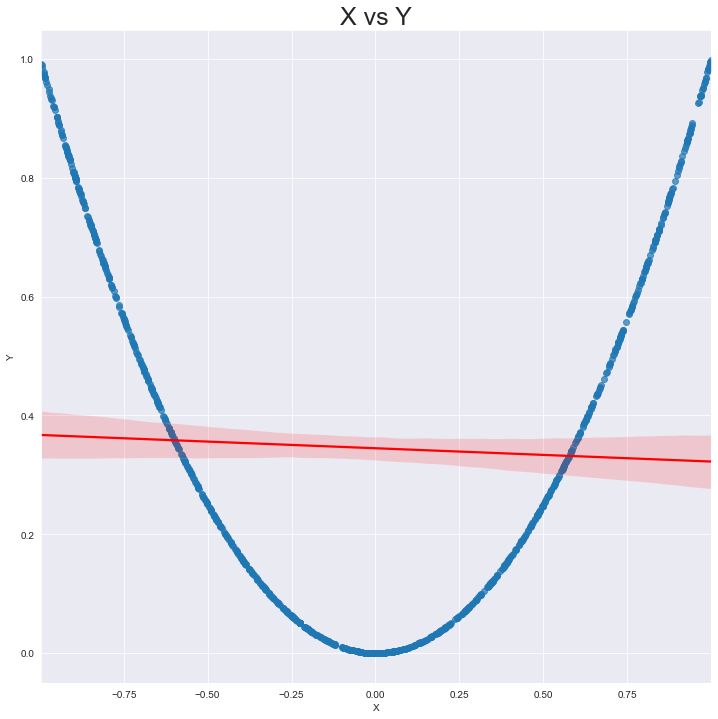

In [20]:
# Hacemos un scatterplot de X vs Y = X^2
sns.set_style("darkgrid")
plt.figure(figsize = (12,12))
ax = sns.regplot(x = 'X',y = 'Y', data = df, scatter_kws={'alpha':0.7}, line_kws={"color": "red"})
ax.set_title("X vs Y",fontsize = '25')
plt.show()

In [21]:
# Mostremos la matriz de varianzas y covarianzas
print('La matriz de varianzas y covarianzas de X y Y es:')
df.cov()

La matriz de varianzas y covarianzas de X y Y es:


,X,Y
X,0.345101,-0.007724
Y,-0.007724,0.090550


In [22]:
# Mostremos la matriz de correlaciones
print('La matriz de correlaciones de X y Y es:')
df.corr()

La matriz de correlaciones de X y Y es:


,X,Y
X,1.000000,-0.043695
Y,-0.043695,1.000000


Como podemos observar, es evidente que $X$ y $Y$ son v.a's dependientes, sin embargo, su correlación/covarianza son 0, ¿a qué se debe esto?, recordemos que la correlación/covarianza mide el nivel de "dependencia" LINEAL entre dos variables aleatorias, claramente la relación mostrada no es lineal, sino cuadrática.

## Correlación con datos reales

Como es de esperarse, estos indicadores resultan altamente útiles en la práctica durante el análisis de datos, ya que es siempre útil conocer el grado de dependencia lineal de dos fenómenos con el propósito ya sea de hacer inferencia o de hacer predicciones con relación al fenómeno de estudio.

Para empezar a comprender dichas métricas en la práctica, veremos dos ejemplos, el primero con el dataset 'Iris' y el segundo con series de tiempo financieras obtenidas de Yahoo Finance, obtendremos conclusiones y trataremos de dar intepretación a dichos resultados.

### Iris

*El conjunto de datos flor Iris o conjunto de datos iris de Fisher es un conjunto de datos multivariante introducido por Ronald Fisher en su artículo de 1936, The use of multiple measurements in taxonomic problems (El uso de medidas múltiples en problemas taxonómicos) como un ejemplo de análisis discriminante lineal. A veces, se llama Iris conjunto de datos de Anderson porque Edgar Anderson coleccionó los datos para cuantificar la variación morfológica de la flor Iris de tres especies relacionadas. Dos de las tres especies se coleccionaron en la Península de la Gaspesia «todos son de la misma pastura, y recolectado el mismo día y medidos al mismo tiempo por la misma persona con el mismo aparato».*

*El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros. Basado en la combinación de estos cuatro rasgos, Fisher desarrolló un modelo discriminante lineal para distinguir entre una especie y otra.*

Para más información sobre el dataset **'Iris'** consulte <a href= https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris>aquí</a>.

**Para todos los interesados en temas de Machine Learning, este dataset será su día a día, acompañandolos desde regresión lineal, pasando por PCA hasta K-Means y KNN**

In [31]:
iris = pd.read_csv('C:\\Users\\Arath Reyes\\Documents\\GitHub\\Probabilidad\\iris.csv')

In [32]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


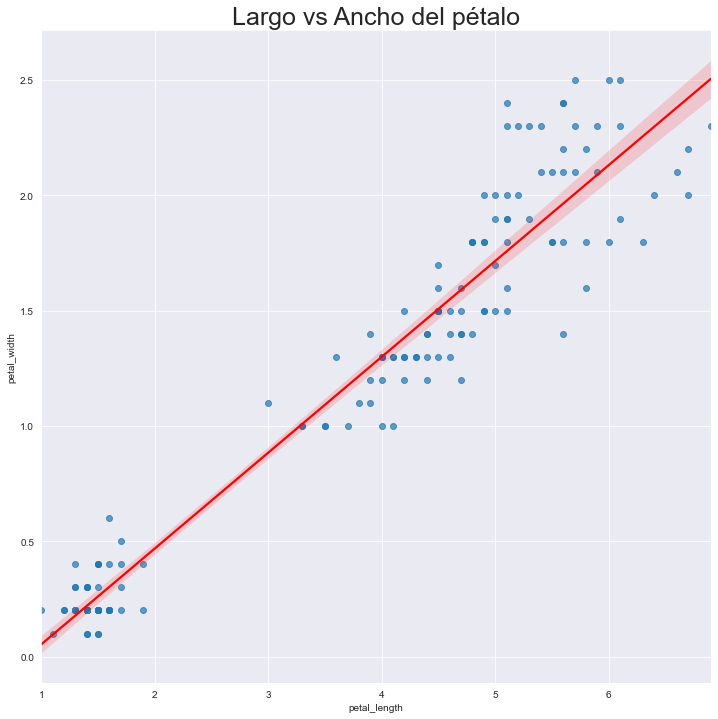

In [49]:
# Hacemos un scatterplot ancho y largo del pétalo
sns.set_style("darkgrid")
plt.figure(figsize = (12,12))
ax = sns.regplot(x = 'petal_length',y = 'petal_width', data = iris, scatter_kws={'alpha':0.7}, line_kws={"color": "red"})
ax.set_title("Largo vs Ancho del pétalo",fontsize = '25')
plt.show()

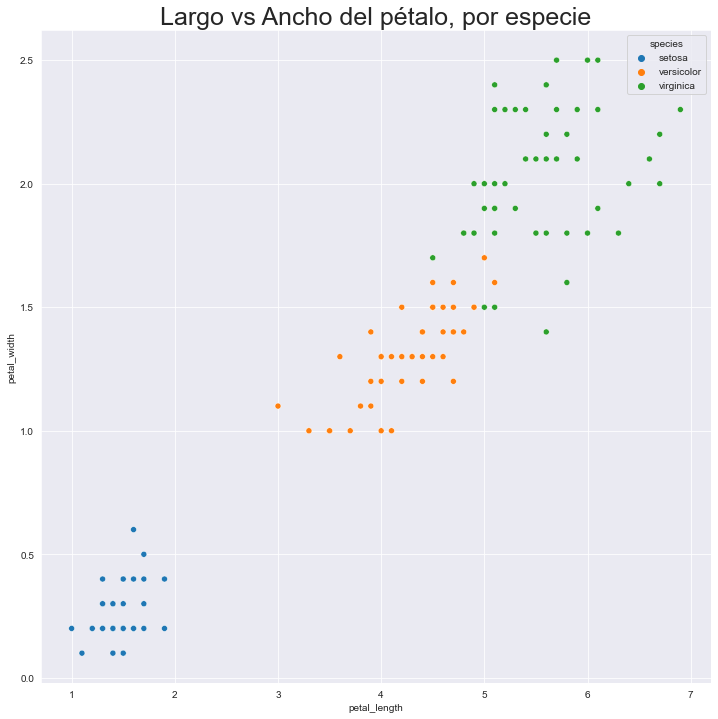

In [50]:
# Hacemos un scatterplot ancho y largo del pétalo, por especie
sns.set_style("darkgrid")
plt.figure(figsize = (12,12))
ax = sns.scatterplot(x = 'petal_length',y = 'petal_width', data = iris, hue = 'species')
ax.set_title("Largo vs Ancho del pétalo, por especie",fontsize = '25')
plt.show()

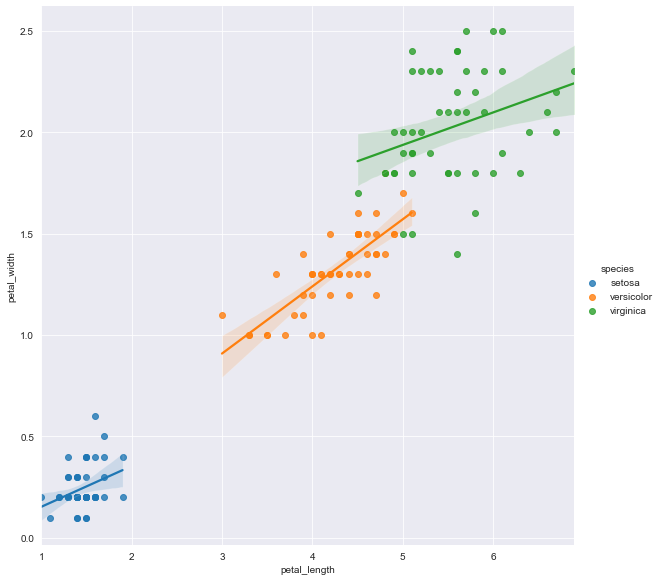

In [51]:
# Con regresion lineal
sns.set_style("darkgrid")
ax = sns.lmplot(x = 'petal_length',y = 'petal_width', data = iris, hue = 'species',height=8)
plt.show()

<Figure size 864x864 with 0 Axes>

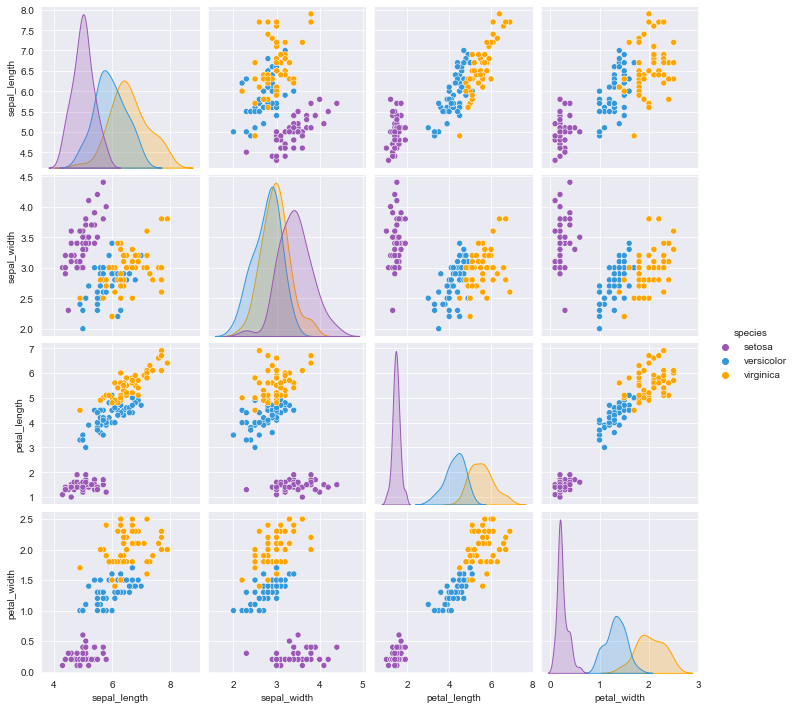

In [56]:
# Ahora todos
sns.set_style("darkgrid")
plt.figure(figsize = (12,12))
sns.pairplot(iris, hue = 'species', palette = ["#9b59b6", "#3498db", "orange"])
plt.show()

Ahora mostremos la matriz de correlación de las variables presentadas:

In [57]:
iris[['sepal_length','sepal_width','petal_length','petal_length']].corr()

,sepal_length,sepal_width,petal_length,petal_length
sepal_length,1.000000,-0.11757,0.871754,0.871754
sepal_width,-0.117570,1.00000,-0.428440,-0.428440
petal_length,0.871754,-0.42844,1.000000,1.000000
petal_length,0.871754,-0.42844,1.000000,1.000000


### Stocks

En la práctica financiera es importante conocer la relación entre diferentes activos dado que puede representar potenciales estrategias de arbitraje como <a href= https://en.wikipedia.org/wiki/Pairs_trade>Pairs Trading</a> y darnos un mejor enfoque del mercado, además de que uno de los modelos más famosos para la teoría de portafolios, el <a href= https://en.wikipedia.org/wiki/Capital_asset_pricing_model>Capital Asset Pricing Model
</a>, describe la relación entre los rendimientos de un activo particular con los rendimientos del *mercado* y el riesgo sistemático, para dicho modelo, conocer el coeficiente de correlación entre el activo y el mercado es fundamental.

Para trabajar con dichas series de tiempo financieras, requerimos descargarlas de Yahoo Finance (*en la práctica existen softwares financieros especializados mucho más confiables como Bloomberg, Murex o Aladdin*) y así poder hacer un análisis de los mismos.

In [58]:
import yfinance as yf

#### Correlación Positiva

Un ejemplo clásico de activos altamente correlacionados, es Pepsi.Co y Coca-Cola. Descarguemos los datos de Yahoo Finance y quedemonos con los precios al cierre.

In [77]:
data = yf.download(['KO','PEP'])
data = data.Close
data = data.dropna()
data = data.reset_index()

[*********************100%***********************]  2 of 2 completed


In [78]:
# Rendimientos
data['Ret_KO'] = (data['KO']/data['KO'].shift(1))-1
data['Ret_PEP'] = (data['PEP']/data['PEP'].shift(1))-1
data = data.dropna()

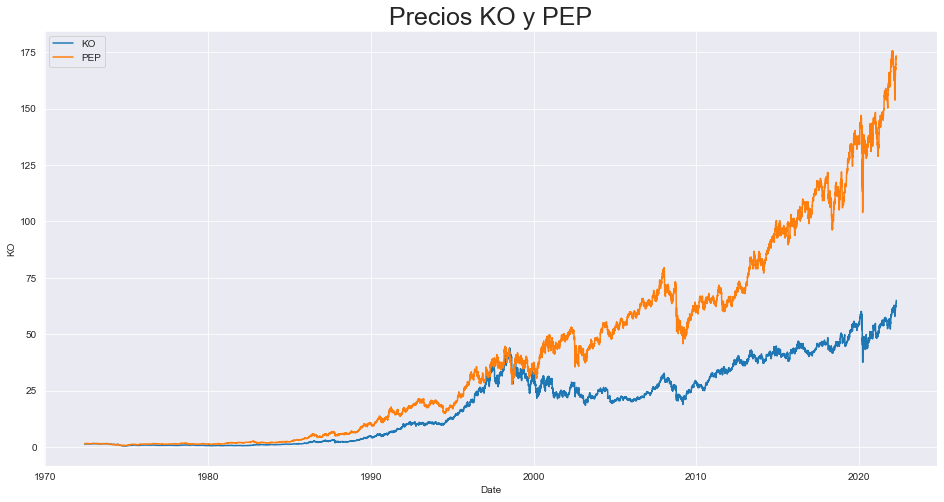

In [82]:
plt.figure(figsize = (16,8))
ax = sns.lineplot(x = 'Date', y = 'KO', data = data, label="KO")
ax = sns.lineplot(x = 'Date', y = 'PEP', data = data, label="PEP")
ax.set_title("Precios KO y PEP",fontsize = '25')
plt.show()

In [60]:
# Precios
data[['KO','PEP']].corr()

,KO,PEP
KO,1.000000,0.950272
PEP,0.950272,1.000000


In [72]:
# Rendimientos
data[['Ret_KO','Ret_PEP']].corr()

,Ret_KO,Ret_PEP
Ret_KO,1.00000,0.52442
Ret_PEP,0.52442,1.00000


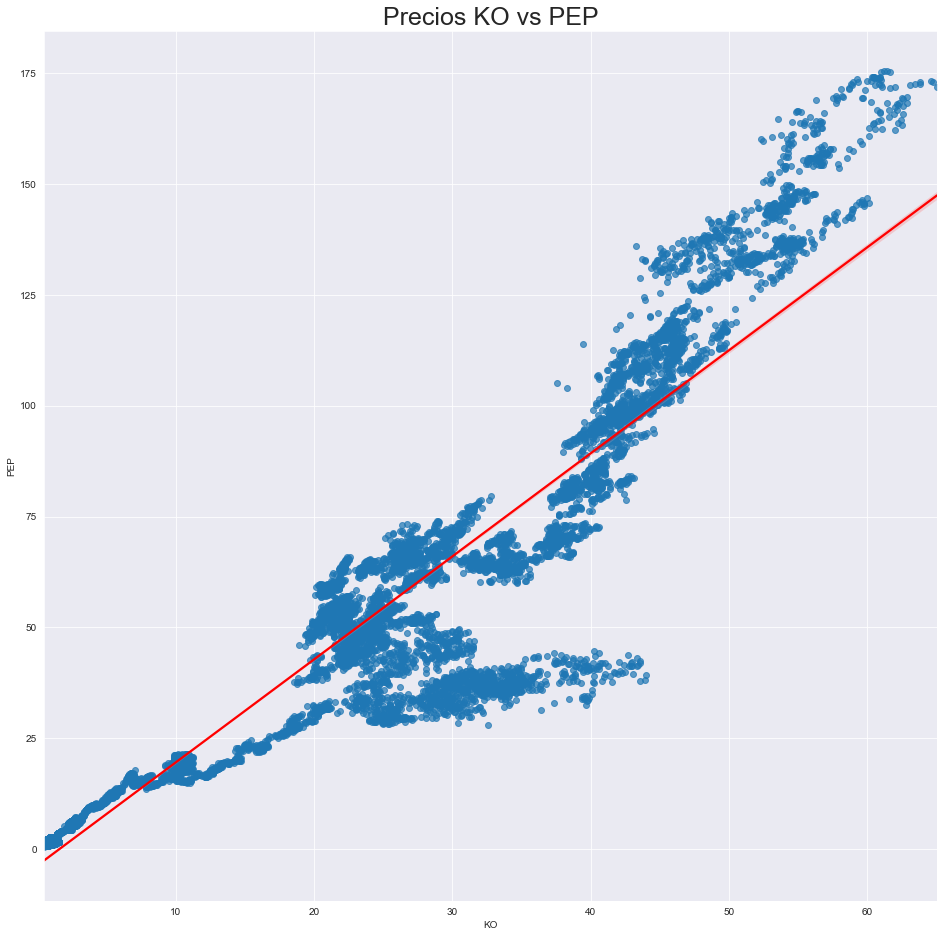

In [83]:
plt.figure(figsize = (16,16))
ax = sns.regplot(x = 'KO', y = 'PEP', data = data, scatter_kws={'alpha':0.7}, line_kws={"color": "red"})
ax.set_title("Precios KO vs PEP",fontsize = '25')
plt.show()

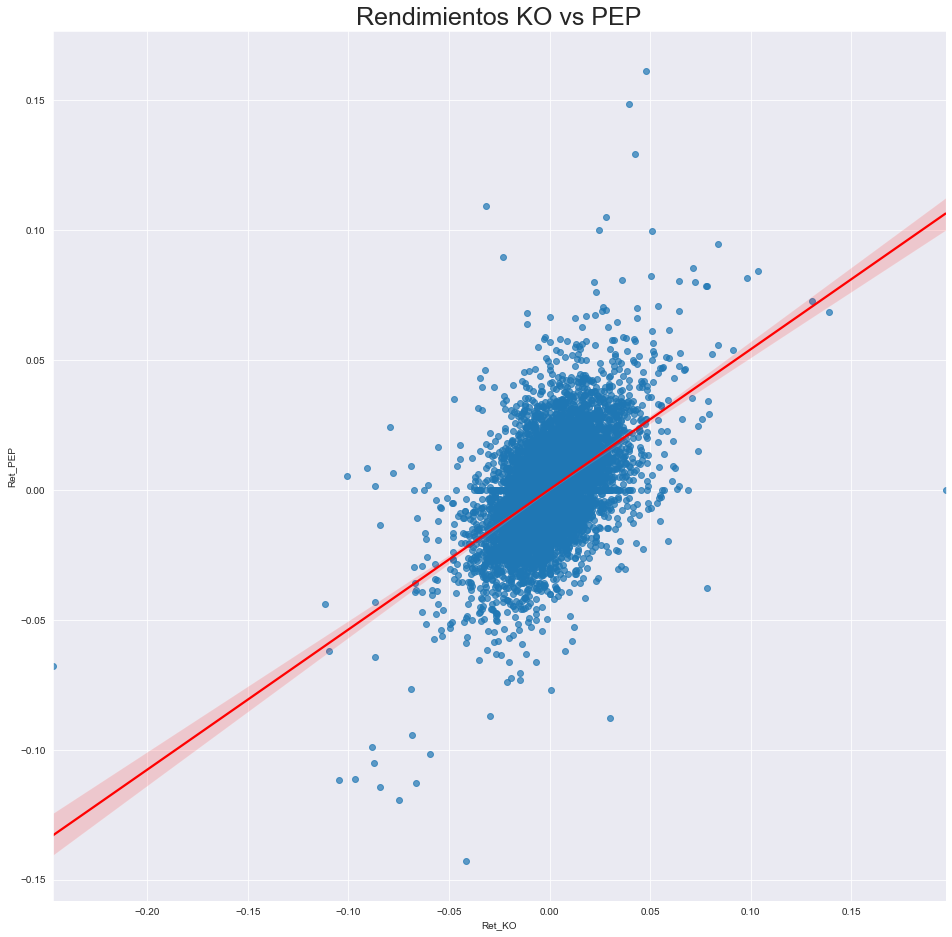

In [80]:
plt.figure(figsize = (16,16))
ax = sns.regplot(x = 'Ret_KO', y = 'Ret_PEP', data = data, scatter_kws={'alpha':0.7}, line_kws={"color": "red"})
ax.set_title("Rendimientos KO vs PEP",fontsize = '25')
plt.show()

Como podemos observar, existe una clara correlación entre los precios de Coca-Cola y Pepsi.Co, esto nos puede sugerir que el sector de las bebidas azucaradas es sensible a fluctuaciones entre sí, es decir, podemos esperar el mismo comportamiento entre Coca-Cola y Pepsi.Co. Por otro lado, podemos esperar, aunque no en la misma medida, una consitente correlación entre los rendimientos de Coca-Cola y Pepsi.Co, es decir, cuando ganamos con Coca-Cola podemos esperar ganar con Pepsi.Co, análogamente con las pérdidas.

#### Correlación Negativa

Veamos qué sucede con la relación entre el precio del petróleo y una de las aerolíneas más importantes del mundo, American Airlines, durante en el que la guerra de Rusia y Ucrania tuvo mayor intensidad, al menos de momento.

In [84]:
data = yf.download(['CL=F','AAL'], start = '2022-01-01', end = '2022-03-15') # (S&P,VST), AAL, 
data = data.Close
data = data.dropna()
data = data.reset_index()

[*********************100%***********************]  2 of 2 completed


In [85]:
# Rendimientos
data['Ret_CL=F'] = (data['CL=F']/data['CL=F'].shift(1))-1
data['Ret_AAL'] = (data['AAL']/data['AAL'].shift(1))-1
data = data.dropna()

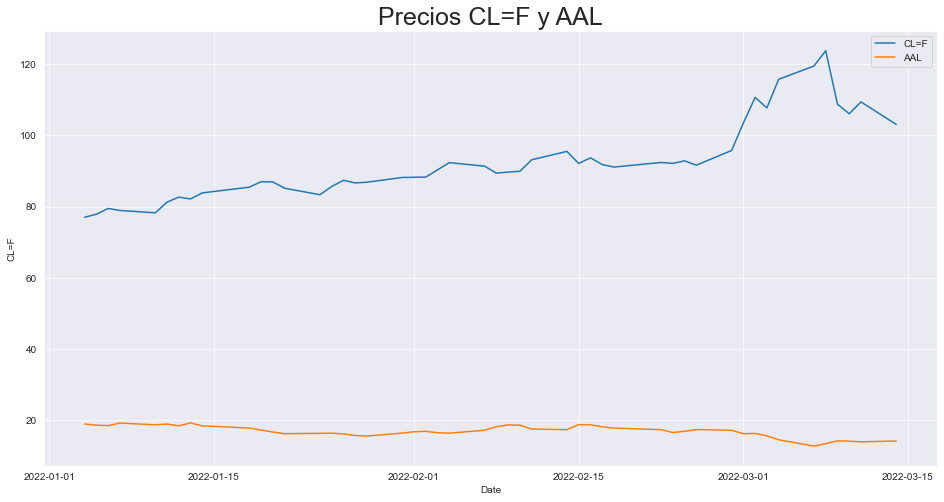

In [87]:
plt.figure(figsize = (16,8))
ax = sns.lineplot(x = 'Date', y = 'CL=F', data = data, label="CL=F")
ax = sns.lineplot(x = 'Date', y = 'AAL', data = data, label="AAL")
ax.set_title("Precios CL=F y AAL",fontsize = '25')
plt.show()

In [88]:
# Precios
data[['CL=F','AAL']].corr()

,CL=F,AAL
CL=F,1.000000,-0.788022
AAL,-0.788022,1.000000


In [89]:
# Rendimientos
data[['Ret_CL=F','Ret_AAL']].corr()

,Ret_CL=F,Ret_AAL
Ret_CL=F,1.000000,-0.441247
Ret_AAL,-0.441247,1.000000


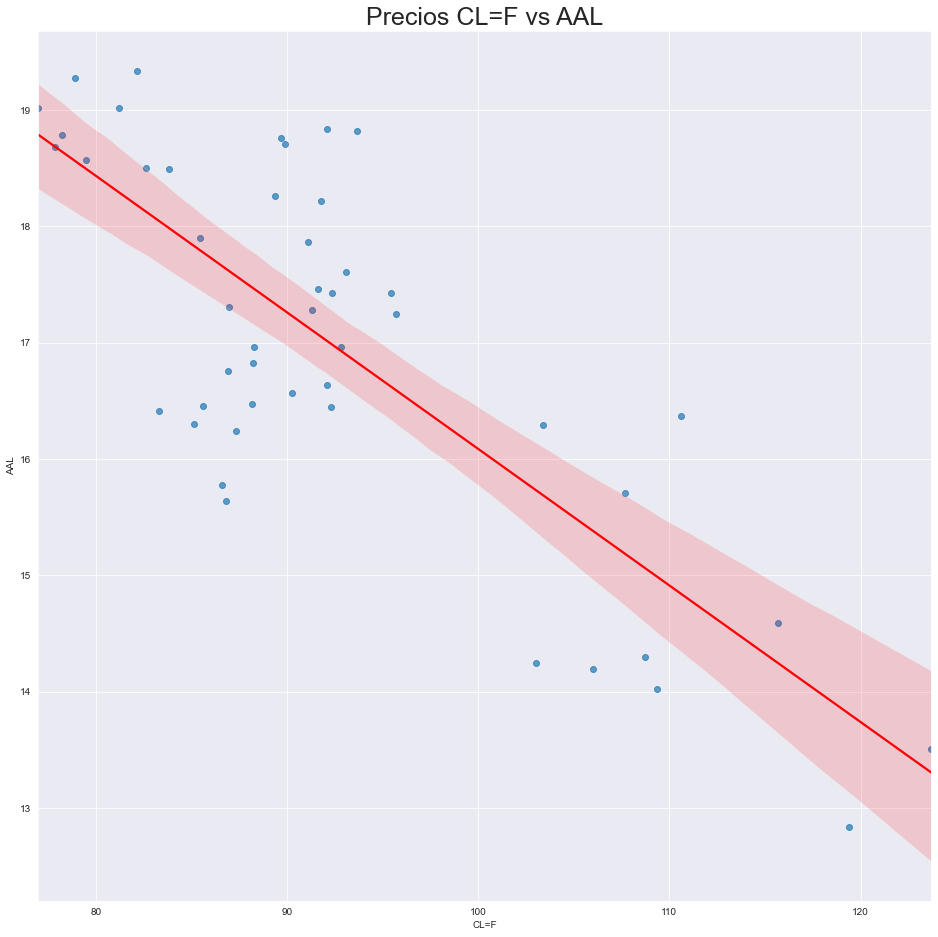

In [90]:
plt.figure(figsize = (16,16))
ax = sns.regplot(x = 'CL=F', y = 'AAL', data = data, scatter_kws={'alpha':0.7}, line_kws={"color": "red"})
ax.set_title("Precios CL=F vs AAL",fontsize = '25')
plt.show()

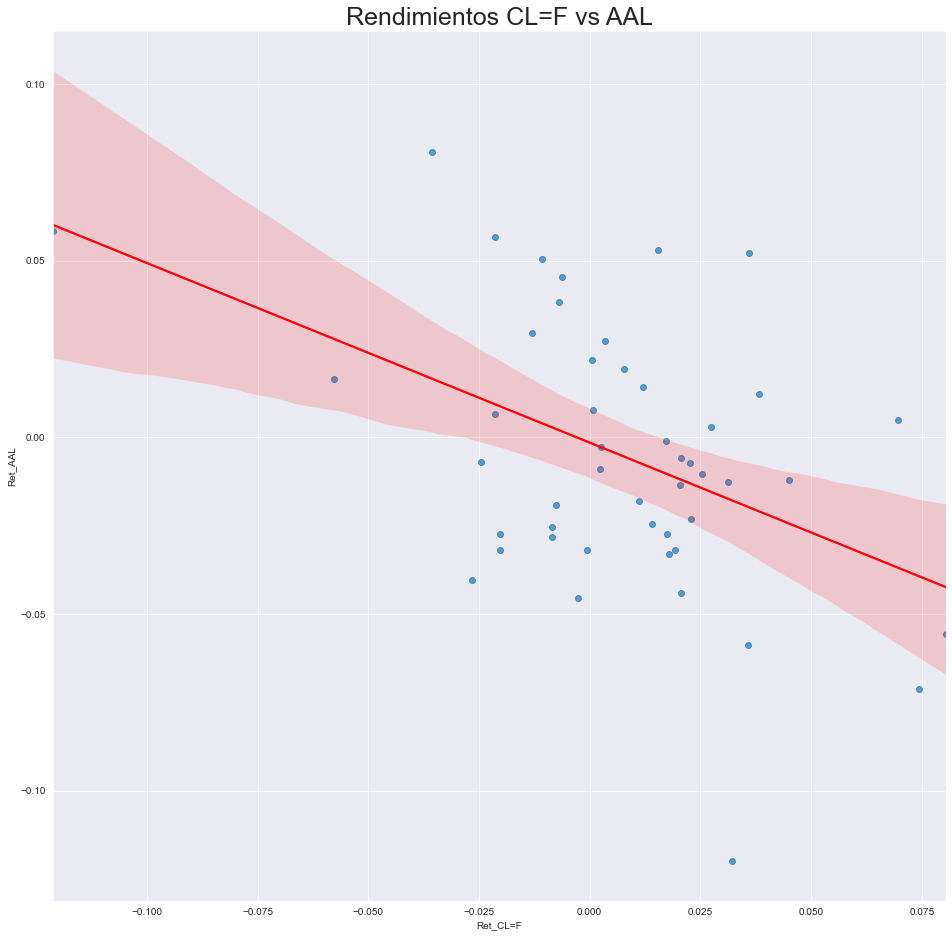

In [91]:
plt.figure(figsize = (16,16))
ax = sns.regplot(x = 'Ret_CL=F', y = 'Ret_AAL', data = data, scatter_kws={'alpha':0.7}, line_kws={"color": "red"})
ax.set_title("Rendimientos CL=F vs AAL",fontsize = '25')
plt.show()

**¿A qué se debe esto?**

Debido a la guerra entre Rusia y Ucrania, periodo que estamos analizando, los precios del petróleo subieron debido a que Rusia es uno de los mayores exportadores de petroleo y gas natural del mundo, y el baneo así como las sansiones a las exportaciones Rusas de energéticos a provocado una alza en los precios de los mismos, particularmente del petroleo <a href= https://www.weforum.org/agenda/2022/03/how-does-the-war-in-ukraine-affect-oil-prices/>[consulta]</a>. Ahora, ¿cómo afecta esto a las aerolíneas? Uno podría esperar que la alza en los precios del petróleo, en consecuencia de las gasolinas, reduzca las ganacias de las compañias de aerolíneas dada su dependencia de este producto, y por ello, se puede esperar una depreciación en el stock de dichas aerolíneas.

## OJO! Correlación no implica causalidad!

Todo lo que hemos mencionado han sido interpretaciones propias acerca de los fenómenos de estudio, la correlación de dos variables en sí mismo no nos indica la relación causa-efecto de las mismas, es decir, no porque dos variables estén correlacionadas significa que en efecto guardan una relación verdadera.

* Super Bowl Market Indicator
* Inversion of the Yield Curve

# Esperanza Condicional

Ahora hagamos un ejercicio de esperanza condicional el cual les puede servir de referencia para sus ejercicio de la tarea y así poder comprobar sus resultados teóricos.

### Minero

Un minero está atrapado en una mina donde hay 3 puertas, las cuales provocan lo siguiente:
* La puerta 1: Lo lleva fuera de la mina en un transcurso de 3 horas
* La puerta 2: Lo regresa al punto de inicio después de 5 horas
* La puerta 3: Lo regresa al punto de inicio después de 7 horas

Suponiendo que el minero escoge la puerta en todo momento con la misma probabilidad, ¿cuántas horas podemos esperar que el minero pase en la mina hasta su salida de la misma?

In [94]:
class Minero:
    
    def __init__(self):
        self.tiempo = 0

    def compute(self):
        puerta = 0
        while puerta!=1:
            puerta = randint(1,3)
            if puerta == 2:
                self.tiempo+=5
            elif puerta == 3:
                self.tiempo+=7
            else:
                self.tiempo+=3
        return

In [96]:
minerito = Minero()
minerito.compute()
minerito.tiempo

15

In [98]:
n = 100000
acum = 0
for _ in range(n):
    minerito = Minero()
    minerito.compute()
    acum += minerito.tiempo
print(acum/n)

15.03889


# Sumas Aleatorias

Recordemos que en clase vimos que dado $N$ una variable aleatoria y $\{X_k\}_{k\in\mathbb{N}}$ un conjunto de variables aleatorias, entonces:
$$\mathbb{E}\left[\sum_{k=1}^{N} X_k\right] = \mathbb{E}[N]\mathbb{E}[X]$$

Veamos un ejemplo de cómo podemos aplicar este resultado

## Pérdidas Aseguradora

Consideremos una aseguradora que tiene, en cierto periodo, una cantidad de siniestro a los que sus clientes expuestos dados por $N\sim Poi(2000)$ (frecuencia) y donde el monto del siniestro por cliente es $X_{k}$ donde:

* $\mathbb{P}[X_k = 1] = \frac{1}{2}$
* $\mathbb{P}[X_k = 2] = \frac{1}{4}$
* $\mathbb{P}[X_k = 3] = \frac{1}{4} \quad \forall k\in\{1,2,\cdots\}$
* $X_0 = 0$

(Asumamos independencia y que la compañia cubre la totalidad del monto del siniestro para todos los clientes)

De esta manera, el riesgo de al que la compañía está expuesta está dado por:
$$R =\sum_{k=0}^{N}X_k$$

Sabemos por lo visto en clase que el valor teórico del monto esperado a pagar por la compañía es:
$$\mathbb{E}\left[\sum_{k=0}^{N} X_k\right] = \mathbb{E}[N]\mathbb{E}[X] = (2000)\left[\frac{1}{2}+\frac{2}{4}+\frac{3}{4}\right]=(2000)\left[\frac{1}{2}+\frac{1}{2}+\frac{3}{4}\right]=(2000)\left[\frac{7}{4}\right] = 3500$$

*Todos los montos en miles*

In [149]:
class Aseguradora:
    
    def __init__(self):
        self.frecuencia = None
        self.severidad = None
        self.perdida = None
    
    def compute(self,lam, montos, probabilidades):
        N = np.random.poisson(lam,1)[0]
        if N == 0:
            self.perdida = 0
        else:
            self.perdida = np.sum(np.random.choice(montos, N, p=probabilidades))
        self.frecuencia = N
        self.severidad = (montos,probabilidades)
        return

In [161]:
lam = 2000
montos = [1,2,3]
probabilidades = [0.5,0.25,0.25]
m = 1000
perdida = 0
for _ in range(m):
    ase = Aseguradora()
    ase.compute(lam,montos, probabilidades)
    perdida += ase.perdida
print('De esta manera podemos ver que la pérdida esperada por la aseguradora es de: ' +str(perdida/m))

De esta manera podemos ver que la pérdida esperada por la aseguradora es de: 3500.979


Este modelo puede ser mejorado agregando un deducible $d$ y un monto máximo de beneficio $u$, entonces:
$$R = \sum_{k=0}^{N}Y_k$$
Donde:
$$Y_k = \max\{\min\{X_k,u\}-d,0\}$$

In [10]:
l = []
n = 1000000

for _ in range(n):
    m = np.random.uniform(0,1,3)
    m.sort()
    l.append(1 if (m[0]+m[1] <= m[2]) else 0)
    
print("La probabilidad es de {0}".format(np.mean(l)))

La probabilidad es de 0.499571
